## Análisis de las aplicaciones y sus conversiones

### ¿Cómo se distribuyeron las instalaciones por cada aplicación?

In [2]:
import pandas as pd
import numpy as np

installs_dtypes = {'ref_type': 'category', 'device_countrycode': 'category',
                   'device_brand': 'category', 'device_model' : 'category', 'session_user_agent': 'category',
                   'user_agent': 'category', 'kind': 'category', 'device_language': 'category'}

installs = pd.read_csv('installs.csv', dtype = installs_dtypes)

installs["created"] =  pd.to_datetime(installs["created"], errors = "coerce") #parseo de fechas
installs["created_gmt"] = installs['created'].dt.tz_localize("UTC").dt.tz_convert('America/Argentina/Cordoba').dt.tz_localize(None)

In [3]:
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('default')
plt.rcParams['figure.figsize'] = (13, 10)

sns.set(style="whitegrid")

In [4]:
installs['cant_installs'] = 1

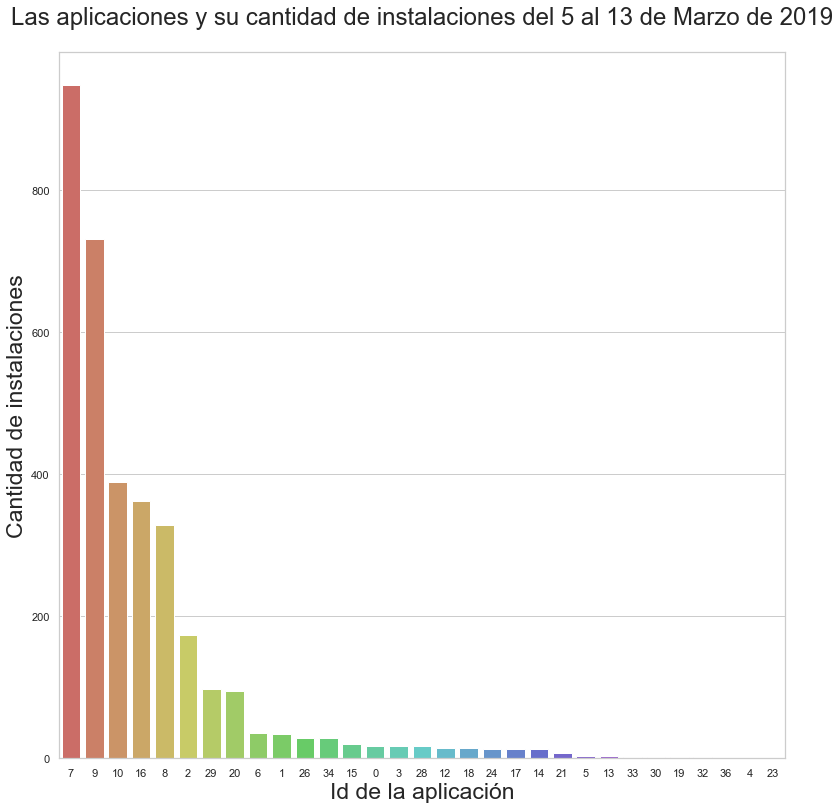

In [20]:
plt.rcParams['figure.figsize'] = (13, 13)

df_to_plot = installs.groupby('application_id').agg({'cant_installs': 'count'}).reset_index()
order_plot = list(installs.application_id.value_counts().index)
graph = sns.barplot(x= df_to_plot['application_id'], y = df_to_plot['cant_installs'], order = order_plot , orient='v', palette="hls")
graph.set_title("Las aplicaciones y su cantidad de instalaciones del 5 al 13 de Marzo de 2019", fontsize = 24)
graph.set_xlabel("Id de la aplicación", fontsize = 23)  #fontdict = font para cambiar la fuente
graph.set_ylabel("Cantidad de instalaciones", fontsize = 23)
graph.title.set_position([.5, 1.03])
plt.savefig("apps_mas_instaladas", dpi = 300)

### ¿Cuáles fueron las dos aplicaciones con más instalaciones por hora?

In [6]:
installs['hora'] = installs['created_gmt'].dt.hour

In [7]:
installs_group = installs.groupby(['hora','application_id']).agg({'cant_installs':'count'})

In [8]:
max_installs_hora = installs_group.sort_values(by = 'cant_installs', ascending = False).groupby(level = 0).head(2)\
.sort_values(by = 'hora', ascending = True).reset_index()

In [9]:
colours = {2: 'blue', 7: 'green', 9: 'black', 10: 'red'}

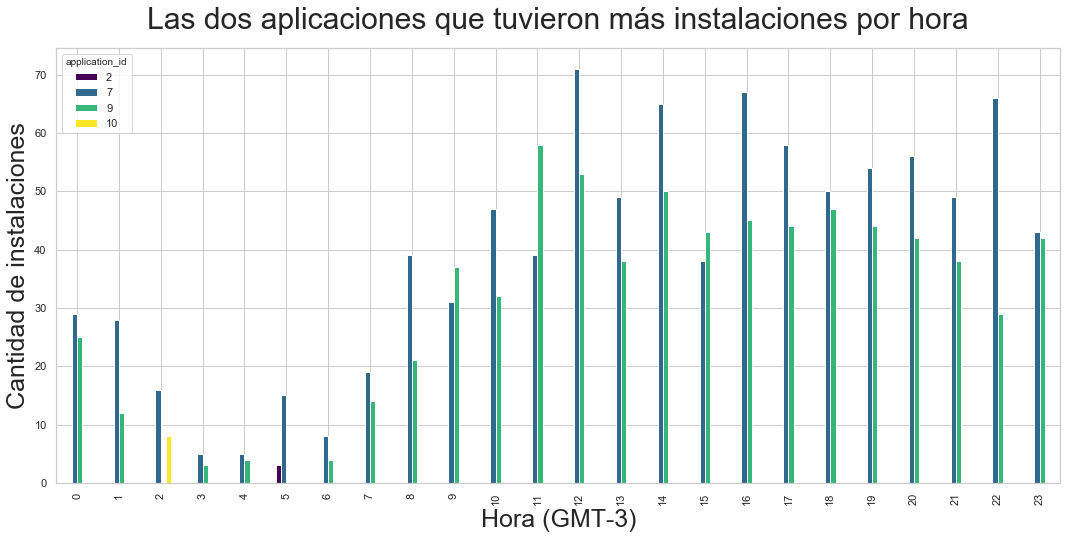

In [21]:
plot = max_installs_hora.pivot(index='hora', columns='application_id', values='cant_installs').plot(kind='bar', figsize = (18,8) ,colormap='viridis')
plot.set_title("Las dos aplicaciones que tuvieron más instalaciones por hora", fontsize = 30)
plot.set_xlabel("Hora (GMT-3)", fontsize = 25)
plot.set_ylabel("Cantidad de instalaciones", fontsize = 25)
plot.title.set_position([.5, 1.03])
plt.savefig("apps_mas_instaladas_hora", dpi = 300)